In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.util import *
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('all')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_pe

[nltk_data]    |   Package maxent_ne_chunker_tab is already up-to-
[nltk_data]    |       date!
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package maxent_treebank_pos_tagger_tab to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_treebank_pos_tagger_tab is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    | 

[nltk_data]    |   Package tagsets_json is already up-to-date!
[nltk_data]    | Downloading package timit to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\saisr\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\User

True

In [5]:
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
from collections import Counter

from matplotlib import ticker
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report


sns.set(style="darkgrid")
import pandas as pd
import numpy as np
import re
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')

import nltk
from nltk.corpus import stopwords

In [6]:
df=pd.read_csv("merded.csv")

In [7]:
df

,augmented_tweet,label
0,['If you get to know astir the statistics of r...,1
1,['@ RahulGandhi Why it is that anyone who has ...,1
2,['when modi promised â € œminimum government l...,1
3,['talk totally the trumpery and continue all t...,1
4,['asking his supporters prefix chowkidar their...,1
...,...,...
7979,You have a good attitude every day.,1
7980,You have a good attitude every day.,1
7981,You have a good attitude every day.,1
7982,You have a good attitude every day.,1


In [8]:
df.rename(columns={'label':'Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'},inplace=True)
df.rename(columns={'augmented_tweet':'Tweets'},inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984 entries, 0 to 7983
Data columns (total 2 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Tweets                                                                   7984 non-null   object
 1   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  7984 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.9+ KB


In [10]:
df

,Tweets,Hate or Offensive language - 0 and Not a Hate or Offensive language - 1
0,['If you get to know astir the statistics of r...,1
1,['@ RahulGandhi Why it is that anyone who has ...,1
2,['when modi promised â € œminimum government l...,1
3,['talk totally the trumpery and continue all t...,1
4,['asking his supporters prefix chowkidar their...,1
...,...,...
7979,You have a good attitude every day.,1
7980,You have a good attitude every day.,1
7981,You have a good attitude every day.,1
7982,You have a good attitude every day.,1


In [11]:
df1=df.dropna()

In [12]:
df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'] = df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'].astype(int)

In [13]:
df1.isna().sum()

Tweets                                                                     0
Hate or Offensive language - 0 and Not a Hate or Offensive language - 1    0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984 entries, 0 to 7983
Data columns (total 2 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Tweets                                                                   7984 non-null   object
 1   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  7984 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 124.9+ KB


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7984 entries, 0 to 7983
Data columns (total 2 columns):
 #   Column                                                                   Non-Null Count  Dtype 
---  ------                                                                   --------------  ----- 
 0   Tweets                                                                   7984 non-null   object
 1   Hate or Offensive language - 0 and Not a Hate or Offensive language - 1  7984 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 93.7+ KB


In [16]:
df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'].value_counts()

1    4765
0    3219
Name: Hate or Offensive language - 0 and Not a Hate or Offensive language - 1, dtype: int64

<Axes: xlabel='Hate or Offensive language - 0 and Not a Hate or Offensive language - 1', ylabel='Count'>

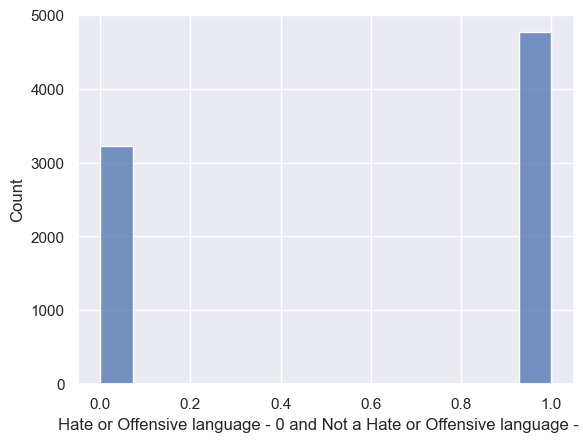

In [17]:
sns.histplot(df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'])

<Axes: xlabel='Hate or Offensive language - 0 and Not a Hate or Offensive language - 1', ylabel='count'>

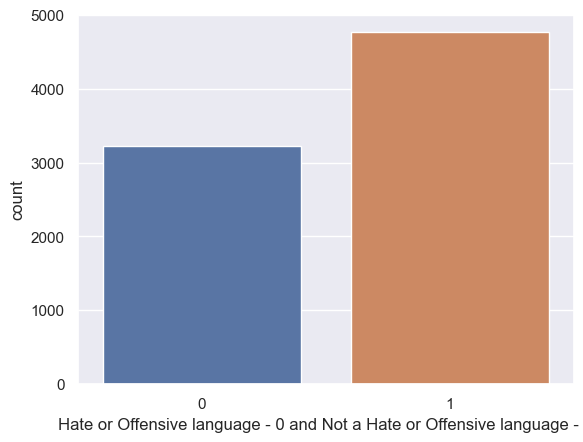

In [18]:
sns.countplot(x='Hate or Offensive language - 0 and Not a Hate or Offensive language - 1', data= df1)

In [19]:
df1["Tweets"] = df1["Tweets"].apply(lambda x:re.sub(r'https?://\S+', '', str(x)))
df1["Tweets"]

0       ['If you get to know astir the statistics of r...
1       ['@ RahulGandhi Why it is that anyone who has ...
2       ['when modi promised â € œminimum government l...
3       ['talk totally the trumpery and continue all t...
4       ['asking his supporters prefix chowkidar their...
                              ...                        
7979                  You have a good attitude every day.
7980                  You have a good attitude every day.
7981                  You have a good attitude every day.
7982                  You have a good attitude every day.
7983                  You have a good attitude every day.
Name: Tweets, Length: 7984, dtype: object

In [20]:
# Lowercase removal
df1['Tweets'] = df1['Tweets'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df1['Tweets']

0       ['if you get to know astir the statistics of r...
1       ['@ rahulgandhi why it is that anyone who has ...
2       ['when modi promised â € œminimum government l...
3       ['talk totally the trumpery and continue all t...
4       ['asking his supporters prefix chowkidar their...
                              ...                        
7979                  you have a good attitude every day.
7980                  you have a good attitude every day.
7981                  you have a good attitude every day.
7982                  you have a good attitude every day.
7983                  you have a good attitude every day.
Name: Tweets, Length: 7984, dtype: object

In [21]:

df1['Tweets'] = df1['Tweets'].str.replace('[^\w\s]','')
df1['Tweets']

0       if you get to know astir the statistics of roa...
1        rahulgandhi why it is that anyone who has pos...
2       when modi promised â  œminimum government leve...
3       talk totally the trumpery and continue all the...
4       asking his supporters prefix chowkidar their n...
                              ...                        
7979                   you have a good attitude every day
7980                   you have a good attitude every day
7981                   you have a good attitude every day
7982                   you have a good attitude every day
7983                   you have a good attitude every day
Name: Tweets, Length: 7984, dtype: object

In [22]:

df1['Tweets'] = df1['Tweets'].apply(lambda x:re.sub(r'@\w+', '', str(x)))
df1['Tweets']

0       if you get to know astir the statistics of roa...
1        rahulgandhi why it is that anyone who has pos...
2       when modi promised â  œminimum government leve...
3       talk totally the trumpery and continue all the...
4       asking his supporters prefix chowkidar their n...
                              ...                        
7979                   you have a good attitude every day
7980                   you have a good attitude every day
7981                   you have a good attitude every day
7982                   you have a good attitude every day
7983                   you have a good attitude every day
Name: Tweets, Length: 7984, dtype: object

In [23]:
# Emoji Removal
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)
df1['Tweets']= df1['Tweets'].apply(str)
df1['Tweets'] =df1['Tweets'].apply(remove_emoji)
df1['Tweets']

0       if you get to know astir the statistics of roa...
1        rahulgandhi why it is that anyone who has pos...
2       when modi promised â  œminimum government leve...
3       talk totally the trumpery and continue all the...
4       asking his supporters prefix chowkidar their n...
                              ...                        
7979                   you have a good attitude every day
7980                   you have a good attitude every day
7981                   you have a good attitude every day
7982                   you have a good attitude every day
7983                   you have a good attitude every day
Name: Tweets, Length: 7984, dtype: object

In [24]:
df1['Tweets']= df1['Tweets'].apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))
df1['Tweets'] = df1['Tweets'].apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))
df1['Tweets']

0       if you get to know astir the statistics of roa...
1        rahulgandhi why it is that anyone who has pos...
2       when modi promised â œminimum government level...
3       talk totally the trumpery and continue all the...
4       asking his supporters prefix chowkidar their n...
                              ...                        
7979                      you havegood attitude every day
7980                      you havegood attitude every day
7981                      you havegood attitude every day
7982                      you havegood attitude every day
7983                      you havegood attitude every day
Name: Tweets, Length: 7984, dtype: object

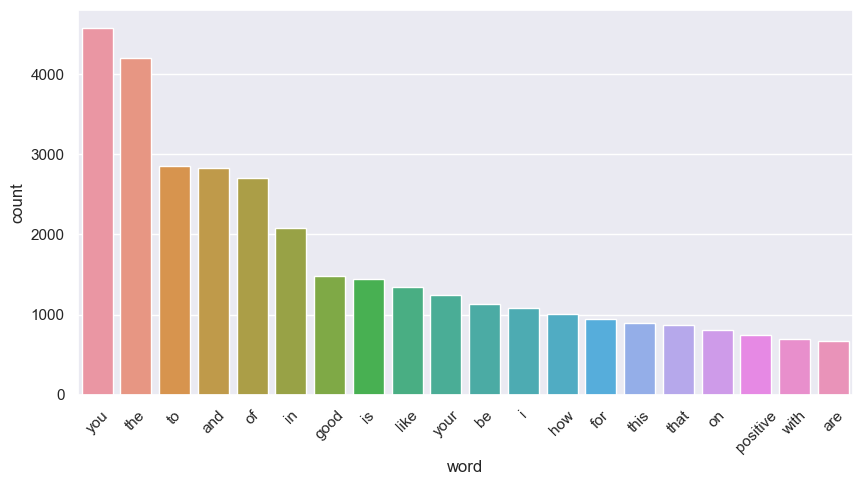

In [25]:
from collections import Counter

words = df1['Tweets'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

In [26]:
# clean the data 

stop_words = set(stopwords.words('english'))
# add some more stop words
stop_words.add('rt') # .......add rt to remove retweet in dataset (noise)



## remove special characters / html entities
def remove_special_char(text):
    return re.sub(r'[^a-zA-Z0-9\s]', '', text)

## remove urls
def remove_urls(text):
    return re.sub(r'http\S+', '', text)

## remove usernames and hashtags
def remove_usernames_hashtags(text):
    return re.sub(r'@\w+|#\w+', '', text)

## remove extra spaces
def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text)

def remove_word(tweet, word='India'):
    return tweet.replace(word, ' ')


##  clean the text
def clean_text(text):
    text = text.lower()
    text = remove_special_char(text)
    text = remove_urls(text)
    text = remove_usernames_hashtags(text)
    text = remove_extra_spaces(text)
    text=remove_word(text, word='India')
    return text

In [27]:
df1['cleaned_tweet'] = df1['Tweets'].apply(clean_text)
df1

,Tweets,Hate or Offensive language - 0 and Not a Hate or Offensive language - 1,cleaned_tweet
0,if you get to know astir the statistics of roa...,1,if you get to know astir the statistics of roa...
1,rahulgandhi why it is that anyone who has pos...,1,rahulgandhi why it is that anyone who has pos...
2,when modi promised â œminimum government level...,1,when modi promised minimum government level be...
3,talk totally the trumpery and continue all the...,1,talk totally the trumpery and continue all the...
4,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...
...,...,...,...
7979,you havegood attitude every day,1,you havegood attitude every day
7980,you havegood attitude every day,1,you havegood attitude every day
7981,you havegood attitude every day,1,you havegood attitude every day
7982,you havegood attitude every day,1,you havegood attitude every day


In [28]:
def remove_stop_words(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

df1['cleaned_tweet_two'] = df1['cleaned_tweet'].apply(remove_stop_words)

df1[['Tweets', 'cleaned_tweet', 'cleaned_tweet_two']].head(10)

,Tweets,cleaned_tweet,cleaned_tweet_two
0,if you get to know astir the statistics of roa...,if you get to know astir the statistics of roa...,get know astir statistics road accident every ...
1,rahulgandhi why it is that anyone who has pos...,rahulgandhi why it is that anyone who has pos...,rahulgandhi anyone poseddirect indirect challe...
2,when modi promised â œminimum government level...,when modi promised minimum government level be...,modi promised minimum government level best go...
3,talk totally the trumpery and continue all the...,talk totally the trumpery and continue all the...,talk totally trumpery continue drama leave vot...
4,asking his supporters prefix chowkidar their n...,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...
5,rahul doesnt crap false promises like modi has...,rahul doesnt crap false promises like modi has...,rahul doesnt crap false promises like modi alw...
6,we may have many problems in but we also have ...,we may have many problems in but we also have ...,may many problems also solution amp usa needs ...
7,vinodkapri rahulgandhi respected indian citiz...,vinodkapri rahulgandhi respected indian citiz...,vinodkapri rahulgandhi respected indian citize...
8,potus under biden politics american manufactu...,potus under biden politics american manufactu...,potus biden politics american manufacturing di...
9,wherefore be pakistani indian dual nationals a...,wherefore be pakistani indian dual nationals a...,wherefore pakistani indian dual nationals allo...


In [29]:
def remove_short_words(text):
    return ' '.join([word for word in text.split() if len(word) > 2])

df1['cleaned_tweet_three'] = df1['cleaned_tweet_two'].apply(remove_short_words)

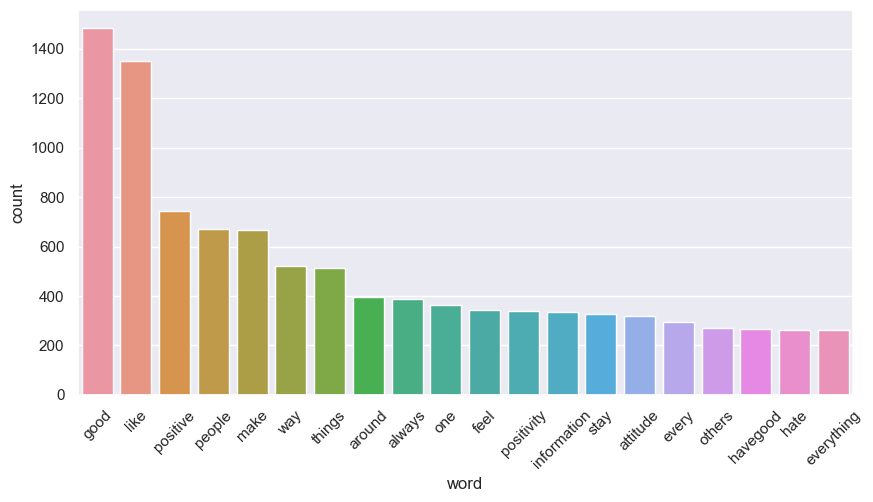

In [30]:
from collections import Counter

words = df1['cleaned_tweet_three'].apply(lambda x: [word for word in x.split()])

# most common words in the dataset (general)
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)

# visualize the most common words
import matplotlib.pyplot as plt
word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))

sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()


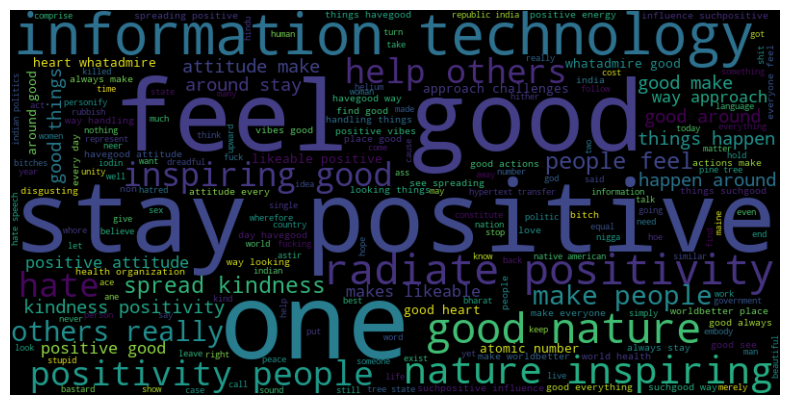

In [31]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [32]:
df1

,Tweets,Hate or Offensive language - 0 and Not a Hate or Offensive language - 1,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three
0,if you get to know astir the statistics of roa...,1,if you get to know astir the statistics of roa...,get know astir statistics road accident every ...,get know astir statistics road accident every ...
1,rahulgandhi why it is that anyone who has pos...,1,rahulgandhi why it is that anyone who has pos...,rahulgandhi anyone poseddirect indirect challe...,rahulgandhi anyone poseddirect indirect challe...
2,when modi promised â œminimum government level...,1,when modi promised minimum government level be...,modi promised minimum government level best go...,modi promised minimum government level best go...
3,talk totally the trumpery and continue all the...,1,talk totally the trumpery and continue all the...,talk totally trumpery continue drama leave vot...,talk totally trumpery continue drama leave vot...
4,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,asking supporters prefix chowkidar names modi ...
...,...,...,...,...,...
7979,you havegood attitude every day,1,you havegood attitude every day,havegood attitude every day,havegood attitude every day
7980,you havegood attitude every day,1,you havegood attitude every day,havegood attitude every day,havegood attitude every day
7981,you havegood attitude every day,1,you havegood attitude every day,havegood attitude every day,havegood attitude every day
7982,you havegood attitude every day,1,you havegood attitude every day,havegood attitude every day,havegood attitude every day


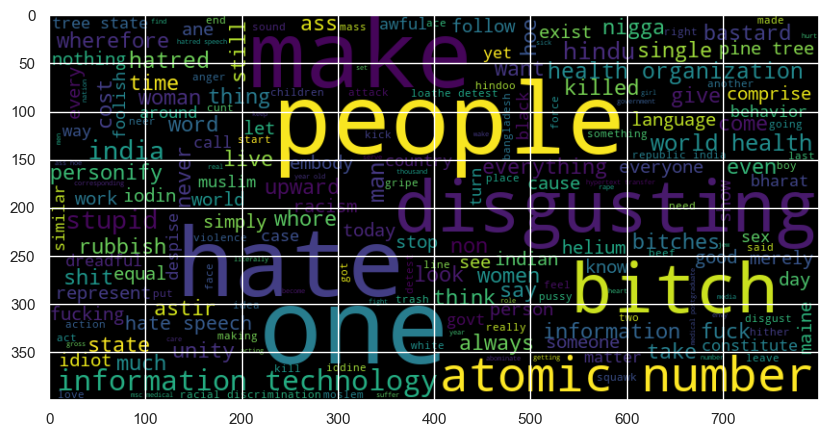

In [33]:
neutral_tweets = df1[df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'] == 0]['cleaned_tweet_three']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])
neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

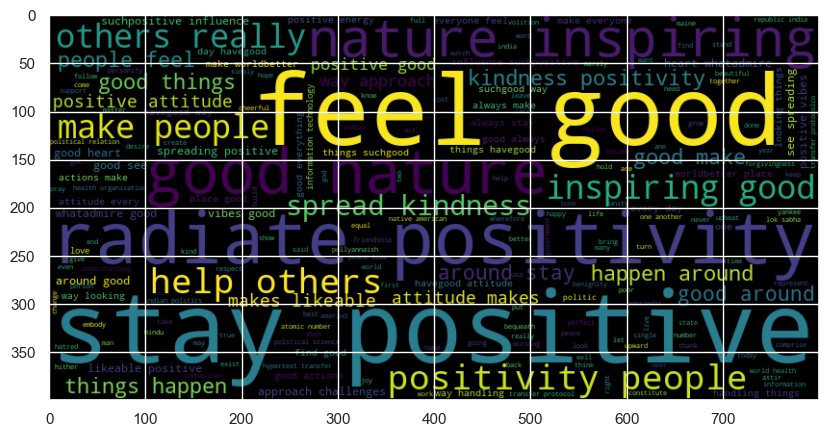

In [34]:
neutral_tweets = df1[df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'] == 1]['cleaned_tweet_three']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])
neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

In [35]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df1['Text_tokenized'] = df1['cleaned_tweet_three'].apply(lambda x: tokenization(x.lower()))
df1.head()

,Tweets,Hate or Offensive language - 0 and Not a Hate or Offensive language - 1,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized
0,if you get to know astir the statistics of roa...,1,if you get to know astir the statistics of roa...,get know astir statistics road accident every ...,get know astir statistics road accident every ...,"[get, know, astir, statistics, road, accident,..."
1,rahulgandhi why it is that anyone who has pos...,1,rahulgandhi why it is that anyone who has pos...,rahulgandhi anyone poseddirect indirect challe...,rahulgandhi anyone poseddirect indirect challe...,"[rahulgandhi, anyone, poseddirect, indirect, c..."
2,when modi promised â œminimum government level...,1,when modi promised minimum government level be...,modi promised minimum government level best go...,modi promised minimum government level best go...,"[modi, promised, minimum, government, level, b..."
3,talk totally the trumpery and continue all the...,1,talk totally the trumpery and continue all the...,talk totally trumpery continue drama leave vot...,talk totally trumpery continue drama leave vot...,"[talk, totally, trumpery, continue, drama, lea..."
4,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,..."


In [36]:
from nltk.stem import WordNetLemmatizer
wordNet = WordNetLemmatizer()
def lemmatizer(text):
    text = [wordNet.lemmatize(word) for word in text]
    return ' '.join(text)

df1['Text_lemmatized'] = df1['Text_tokenized'].apply(lambda x: lemmatizer(x))
df1.head()

,Tweets,Hate or Offensive language - 0 and Not a Hate or Offensive language - 1,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized,Text_lemmatized
0,if you get to know astir the statistics of roa...,1,if you get to know astir the statistics of roa...,get know astir statistics road accident every ...,get know astir statistics road accident every ...,"[get, know, astir, statistics, road, accident,...",get know astir statistic road accident every m...
1,rahulgandhi why it is that anyone who has pos...,1,rahulgandhi why it is that anyone who has pos...,rahulgandhi anyone poseddirect indirect challe...,rahulgandhi anyone poseddirect indirect challe...,"[rahulgandhi, anyone, poseddirect, indirect, c...",rahulgandhi anyone poseddirect indirect challe...
2,when modi promised â œminimum government level...,1,when modi promised minimum government level be...,modi promised minimum government level best go...,modi promised minimum government level best go...,"[modi, promised, minimum, government, level, b...",modi promised minimum government level best go...
3,talk totally the trumpery and continue all the...,1,talk totally the trumpery and continue all the...,talk totally trumpery continue drama leave vot...,talk totally trumpery continue drama leave vot...,"[talk, totally, trumpery, continue, drama, lea...",talk totally trumpery continue drama leave vot...
4,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,...",asking supporter prefix chowkidar name modi gr...


In [37]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
def stemmer(text): 
    tokens = word_tokenize(text)  # Tokenize the text into words
    stemmed_words = [ps.stem(word) for word in tokens]
    return ''.join(text)

df1['Text_stemming'] = df1['Text_lemmatized'].apply(lambda x: stemmer(x))
df1.head()

,Tweets,Hate or Offensive language - 0 and Not a Hate or Offensive language - 1,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized,Text_lemmatized,Text_stemming
0,if you get to know astir the statistics of roa...,1,if you get to know astir the statistics of roa...,get know astir statistics road accident every ...,get know astir statistics road accident every ...,"[get, know, astir, statistics, road, accident,...",get know astir statistic road accident every m...,get know astir statistic road accident every m...
1,rahulgandhi why it is that anyone who has pos...,1,rahulgandhi why it is that anyone who has pos...,rahulgandhi anyone poseddirect indirect challe...,rahulgandhi anyone poseddirect indirect challe...,"[rahulgandhi, anyone, poseddirect, indirect, c...",rahulgandhi anyone poseddirect indirect challe...,rahulgandhi anyone poseddirect indirect challe...
2,when modi promised â œminimum government level...,1,when modi promised minimum government level be...,modi promised minimum government level best go...,modi promised minimum government level best go...,"[modi, promised, minimum, government, level, b...",modi promised minimum government level best go...,modi promised minimum government level best go...
3,talk totally the trumpery and continue all the...,1,talk totally the trumpery and continue all the...,talk totally trumpery continue drama leave vot...,talk totally trumpery continue drama leave vot...,"[talk, totally, trumpery, continue, drama, lea...",talk totally trumpery continue drama leave vot...,talk totally trumpery continue drama leave vot...
4,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,...",asking supporter prefix chowkidar name modi gr...,asking supporter prefix chowkidar name modi gr...


In [38]:
df1

,Tweets,Hate or Offensive language - 0 and Not a Hate or Offensive language - 1,cleaned_tweet,cleaned_tweet_two,cleaned_tweet_three,Text_tokenized,Text_lemmatized,Text_stemming
0,if you get to know astir the statistics of roa...,1,if you get to know astir the statistics of roa...,get know astir statistics road accident every ...,get know astir statistics road accident every ...,"[get, know, astir, statistics, road, accident,...",get know astir statistic road accident every m...,get know astir statistic road accident every m...
1,rahulgandhi why it is that anyone who has pos...,1,rahulgandhi why it is that anyone who has pos...,rahulgandhi anyone poseddirect indirect challe...,rahulgandhi anyone poseddirect indirect challe...,"[rahulgandhi, anyone, poseddirect, indirect, c...",rahulgandhi anyone poseddirect indirect challe...,rahulgandhi anyone poseddirect indirect challe...
2,when modi promised â œminimum government level...,1,when modi promised minimum government level be...,modi promised minimum government level best go...,modi promised minimum government level best go...,"[modi, promised, minimum, government, level, b...",modi promised minimum government level best go...,modi promised minimum government level best go...
3,talk totally the trumpery and continue all the...,1,talk totally the trumpery and continue all the...,talk totally trumpery continue drama leave vot...,talk totally trumpery continue drama leave vot...,"[talk, totally, trumpery, continue, drama, lea...",talk totally trumpery continue drama leave vot...,talk totally trumpery continue drama leave vot...
4,asking his supporters prefix chowkidar their n...,1,asking his supporters prefix chowkidar their n...,asking supporters prefix chowkidar names modi ...,asking supporters prefix chowkidar names modi ...,"[asking, supporters, prefix, chowkidar, names,...",asking supporter prefix chowkidar name modi gr...,asking supporter prefix chowkidar name modi gr...
...,...,...,...,...,...,...,...,...
7979,you havegood attitude every day,1,you havegood attitude every day,havegood attitude every day,havegood attitude every day,"[havegood, attitude, every, day]",havegood attitude every day,havegood attitude every day
7980,you havegood attitude every day,1,you havegood attitude every day,havegood attitude every day,havegood attitude every day,"[havegood, attitude, every, day]",havegood attitude every day,havegood attitude every day
7981,you havegood attitude every day,1,you havegood attitude every day,havegood attitude every day,havegood attitude every day,"[havegood, attitude, every, day]",havegood attitude every day,havegood attitude every day
7982,you havegood attitude every day,1,you havegood attitude every day,havegood attitude every day,havegood attitude every day,"[havegood, attitude, every, day]",havegood attitude every day,havegood attitude every day


In [39]:
X = df1["cleaned_tweet_three"]
y = df1["Hate or Offensive language - 0 and Not a Hate or Offensive language - 1"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [41]:
x = df1["Text_lemmatized"].astype(str)
y=np.array(df1["Hate or Offensive language - 0 and Not a Hate or Offensive language - 1"])
cv=CountVectorizer()
x=cv.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [42]:
DT=DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [43]:
test_data="i like you"
df=cv.transform([test_data]).toarray()
print(DT.predict(df))

[1]


In [44]:
def model_evaluate(model,x_test):
    y_pred = model.predict(x_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    cm_df = pd.DataFrame(cm,
                     index = ['hate speech','Neutral'], 
                     columns = ['hate speech','Neutral'])

    #Plotting the confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df, annot=True, cmap="Oranges",linecolor="gray")
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Values')
    plt.xlabel('Predicted Values')
    plt.show()

              precision    recall  f1-score   support

           0       0.94      0.85      0.89      1057
           1       0.90      0.97      0.93      1578

    accuracy                           0.92      2635
   macro avg       0.92      0.91      0.91      2635
weighted avg       0.92      0.92      0.92      2635



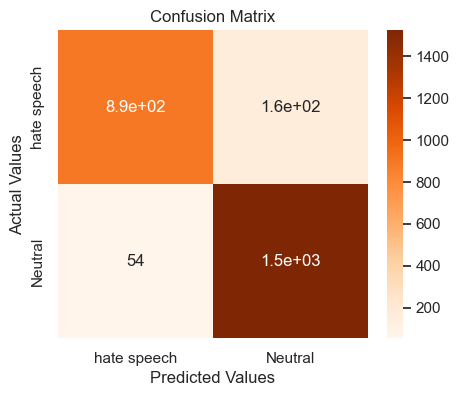

In [45]:
 model_evaluate(DT,x_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [47]:
df1.columns

Index(['Tweets',
       'Hate or Offensive language - 0 and Not a Hate or Offensive language - 1',
       'cleaned_tweet', 'cleaned_tweet_two', 'cleaned_tweet_three',
       'Text_tokenized', 'Text_lemmatized', 'Text_stemming'],
      dtype='object')

In [48]:
x_train, x_test, y_train, y_test = train_test_split(df1['Text_stemming'], df1["Hate or Offensive language - 0 and Not a Hate or Offensive language - 1"], test_size=0.2, random_state=42)
vectorizer = TfidfVectorizer()
x_train_vec = vectorizer.fit_transform(x_train)
x_test_vec = vectorizer.transform(x_test)

lr_model = LogisticRegression()
lr_model.fit(x_train_vec, y_train)
y_pred = lr_model.predict(x_test_vec)

In [49]:
y_pred

array([1, 1, 0, ..., 1, 1, 0])

              precision    recall  f1-score   support

           0       0.90      0.98      0.94       642
           1       0.99      0.92      0.95       955

    accuracy                           0.95      1597
   macro avg       0.94      0.95      0.94      1597
weighted avg       0.95      0.95      0.95      1597



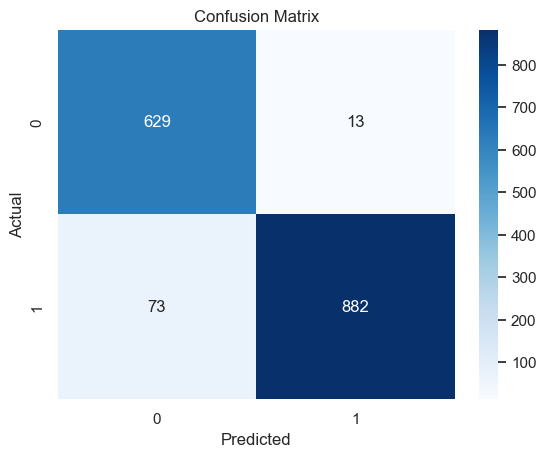

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'model_evaluate' function to evaluate the model
def model_evaluate(model, x_test_vec):
    y_pred = model.predict(x_test_vec)

    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Confusion Matrix')
    plt.show()

# Vectorize the test data and evaluate the model
model_evaluate(lr_model, x_test_vec)


In [51]:
Dt=DecisionTreeClassifier()
Dt.fit(x_train_vec, y_train)
y_pred = Dt.predict(x_test_vec)

              precision    recall  f1-score   support

           0       0.93      0.85      0.89       642
           1       0.91      0.95      0.93       955

    accuracy                           0.91      1597
   macro avg       0.92      0.90      0.91      1597
weighted avg       0.91      0.91      0.91      1597



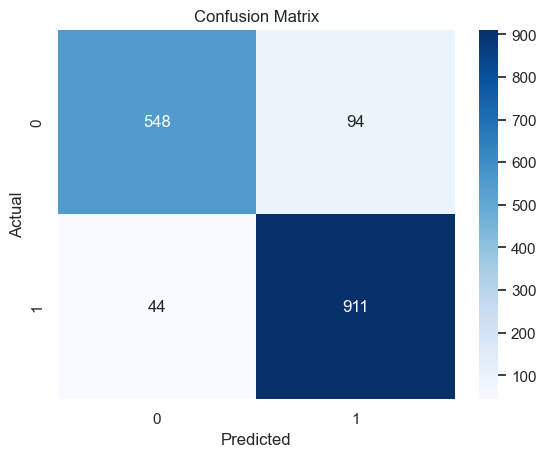

In [52]:
model_evaluate(Dt, x_test_vec)

In [53]:
user_input = input("Enter a tweet or text to classify as Hate Speech (1) or Not Hate Speech (0): ")
input_vec = vectorizer.transform([user_input])
prediction = Dt.predict(input_vec)
print(prediction)

Enter a tweet or text to classify as Hate Speech (1) or Not Hate Speech (0): i like you
[1]


In [54]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(x_train_vec, y_train)
y_pred_nb = nb_model.predict(x_test_vec)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       642
           1       0.97      0.95      0.96       955

    accuracy                           0.95      1597
   macro avg       0.95      0.95      0.95      1597
weighted avg       0.95      0.95      0.95      1597



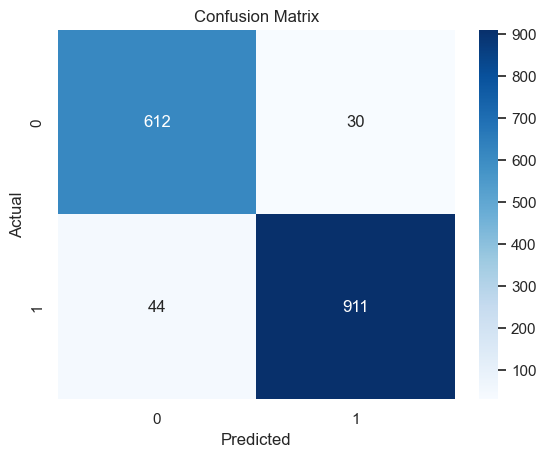

In [55]:
model_evaluate(nb_model, x_test_vec)

In [56]:
user_input = input("Enter a tweet or text to classify as Hate Speech (0) or Not Hate Speech (1): ")
input_vec = vectorizer.transform([user_input])
prediction = nb_model.predict(input_vec)
print(prediction)

Enter a tweet or text to classify as Hate Speech (0) or Not Hate Speech (1): your good boy
[1]


In [57]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
svm_model = SVC(kernel='linear')
svm_model.fit(x_train_vec, y_train)
y_pred_svm = svm_model.predict(x_test_vec)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       642
           1       0.99      0.98      0.99       955

    accuracy                           0.98      1597
   macro avg       0.98      0.98      0.98      1597
weighted avg       0.98      0.98      0.98      1597



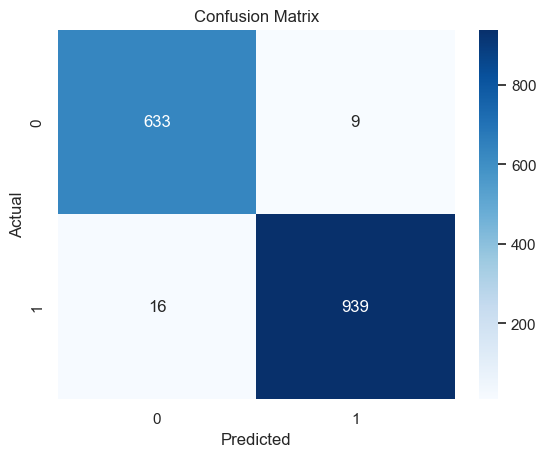

In [58]:
model_evaluate(svm_model, x_test_vec)

In [59]:
def svm_txt(text):
    user_input = text
    input_vec =vectorizer.transform([user_input])
    prediction = svm_model.predict(input_vec)

    if prediction ==0:
        print(text)
        print("hate and offensive")
    else:
        print(text)
        print("NO HATE AND OFFENSIVE")

In [ ]:
def svm_txt(vectorizer, svm_model, text):

    input_vec = vectorizer.transform([text])
    
    prediction = svm_model.predict(input_vec)
    if prediction == 0:
        print("Hate and Offensive")
        print(text)
    else:
        print("No Hate and Offensive")
text = input("Enter a tweet or text to classify as Hate Speech (0) or Not Hate Speech (1): ")
print( svm_txt(vectorizer, svm_model, text))

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_vec, y_train)

RandomForestClassifier(random_state=42)

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       642
           1       0.95      0.96      0.95       955

    accuracy                           0.95      1597
   macro avg       0.95      0.94      0.94      1597
weighted avg       0.95      0.95      0.95      1597



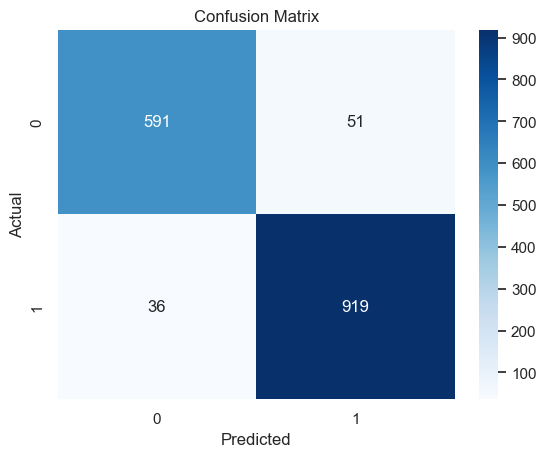

In [62]:
model_evaluate(rf_classifier, x_test_vec)

In [63]:
import xgboost as xgb
xgb= xgb.XGBClassifier()
xgb.fit(x_train_vec, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

              precision    recall  f1-score   support

           0       0.86      0.95      0.90       642
           1       0.96      0.89      0.93       955

    accuracy                           0.91      1597
   macro avg       0.91      0.92      0.91      1597
weighted avg       0.92      0.91      0.92      1597



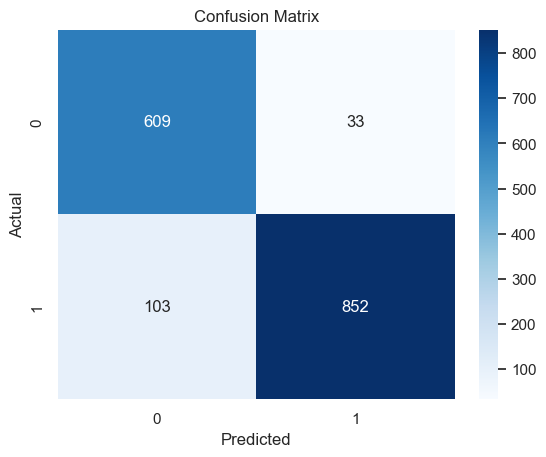

In [64]:
model_evaluate(xgb, x_test_vec)

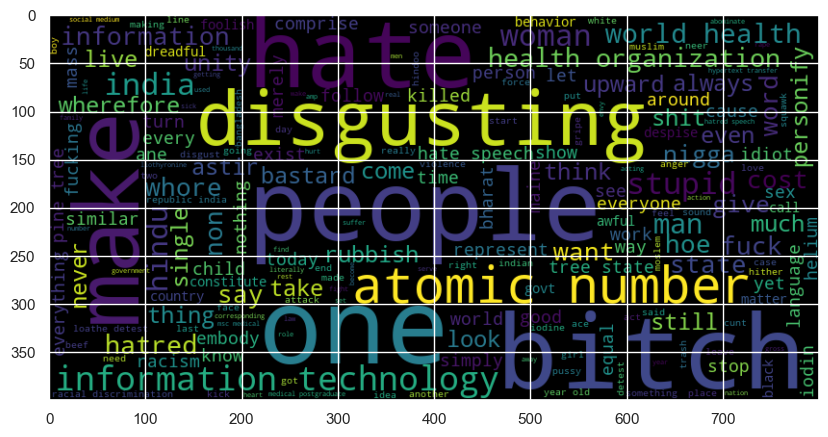

In [65]:
neutral_tweets = df1[df1['Hate or Offensive language - 0 and Not a Hate or Offensive language - 1'] == 0]['Text_lemmatized']
neutral_words = neutral_tweets.apply(lambda x: [word for word in x.split()])
neutral_words = [word for sublist in neutral_words for word in sublist]
neutral_word_count = Counter(neutral_words)
neutral_word_count.most_common(20)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_words))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

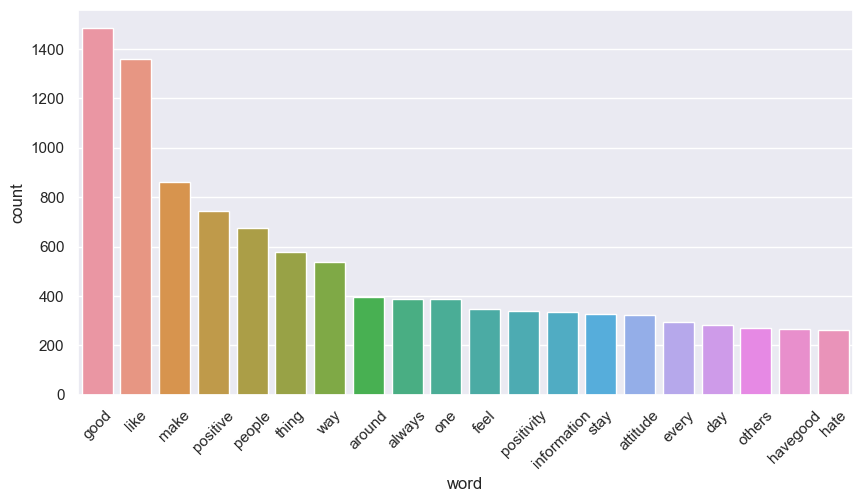

In [66]:
from collections import Counter

words = df1['Text_lemmatized'].apply(lambda x: [word for word in x.split()])
words = [word for sublist in words for word in sublist]
word_count = Counter(words)
word_count.most_common(20)
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))

sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

In [67]:
df3=pd.read_csv("filtered_offensive_hate_words_dataset.csv")

In [68]:
keywords = ['Christ']
df_cleaned = df3[~df3['Word'].str.contains('|'.join(keywords), case=False, na=False)]

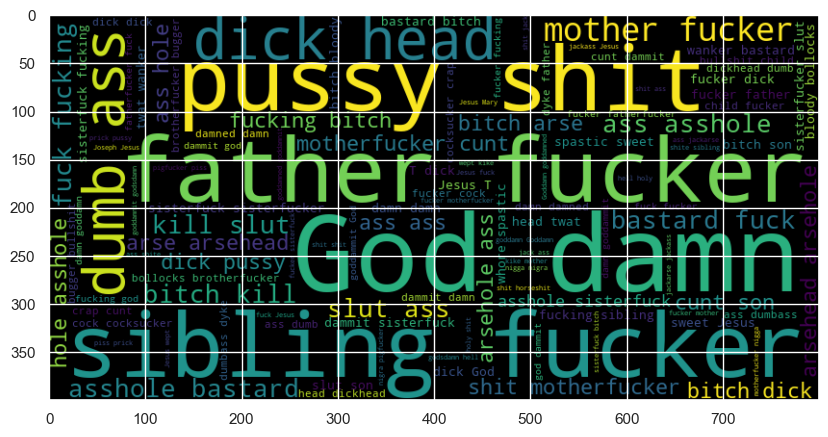

In [69]:
neutral_tweets = df_cleaned['Word']
neutral_word_count = Counter(neutral_tweets)
neutral_word_count.most_common(20)
wordcloud = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(' '.join(neutral_tweets))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')

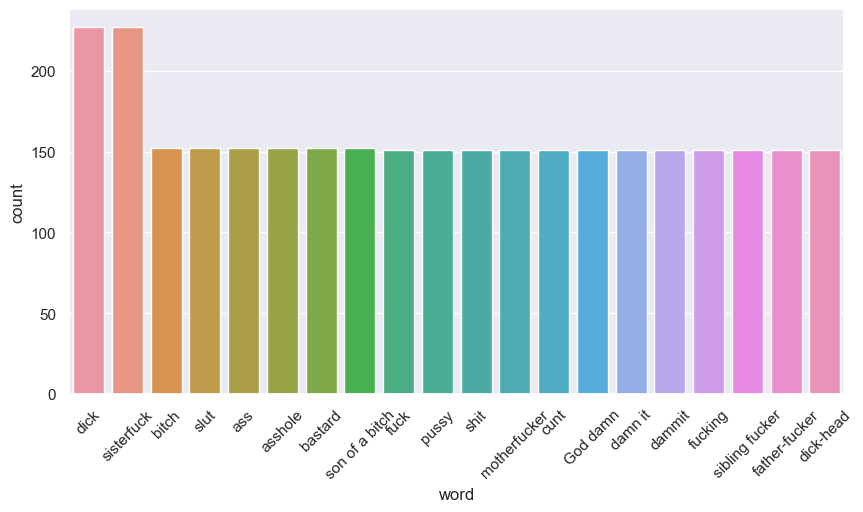

In [70]:
from collections import Counter

words = df3['Word']
word_count = Counter(words)
word_count.most_common(20)
import matplotlib.pyplot as plt

word_count_df = pd.DataFrame(word_count.most_common(20), columns=['word', 'count'])

plt.figure(figsize=(10, 5))

sns.barplot(x='word', y='count', data=word_count_df)
plt.xticks(rotation=45)
plt.show()

In [71]:
!pip install SpeechRecognition


In [72]:
! pip install SpeechRecognition pydub

In [73]:
import speech_recognition as sr
from pydub import AudioSegment
audio = AudioSegment.from_mp3(r"C:\Users\saisr\Downloads\record_out.wav")
audio.export("audio.wav", format="wav")
recognizer = sr.Recognizer()
with sr.AudioFile("audio.wav") as source:
    audio_data = recognizer.record(source)
    text = recognizer.recognize_google(audio_data)

print("Transcribed text:", text)


ConnectionAbortedError: [WinError 10053] An established connection was aborted by the software in your host machine

In [ ]:
svm_txt(vectorizer, svm_model, text)